# Predicting stock prices with LSTM networks
## By Khaled Tinubu

In [159]:
#import statements
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

#read the annotated file 
spx_data = pd.read_csv('spx_data.csv')

### This is what our data looks like
 We have 6 features: The opening price, the daily high, low, the adjusted closing price, the volume and finally the actual closing price 

We will first preprocess our data and then build a LSTM network in order to model the fluctuations of the S&P 500 as a time series

Here's a look at what the data looks like:

In [160]:
spx_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


 now we can proceed with the analysis

In [161]:
# reorder data frame to put the closing price at the end of the arrays
spx_data = spx_data[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']]
spx_data_close =  spx_data[['Close']]
spx_data

,Open,High,Low,Adj Close,Volume,Close
0,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078
1,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000
2,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000
3,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980
4,2273.590088,2275.489990,2268.899902,2268.899902,3217610000,2268.899902
5,2269.719971,2279.270020,2265.270020,2268.899902,3638790000,2268.899902
6,2268.600098,2275.320068,2260.830078,2275.320068,3620410000,2275.320068
7,2271.139893,2271.780029,2254.250000,2270.439941,3462130000,2270.439941
8,2272.739990,2278.679932,2271.510010,2274.639893,3081270000,2274.639893
9,2269.139893,2272.080078,2262.810059,2267.889893,3584990000,2267.889893


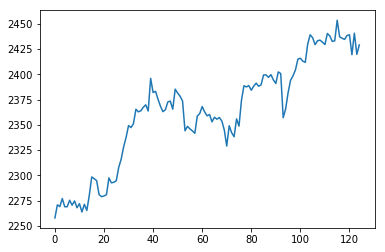

In [162]:
plt.pyplot.plot(spx_data_close)
plt.pyplot.show()
#this is a plot of the closing prices over time

In [163]:
#normalize the data
normalized_spx_data = StandardScaler().fit_transform(spx_data)



In [164]:
## N.B the function below is a modifed form of a helped function written by Jakob Aungier 
## (full citation in lstm.py)

def prep_data(data, seq_len):
    """
    Returns the input data and targets for testing and validation sets 
    data -> the full corpus of data
    
    seq_len -> the length of our sequence

    """
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
        
    result = np.array(result)
    
    # 90% train, 10% validation partition
    partition = round(0.9 * result.shape[0])
    train = result[:int(partition), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1, -1]
    x_test = result[int(partition):, :-1]
    y_test = result[int(partition):, -1, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))  

    return [x_train, y_train, x_test, y_test]

In [165]:
X_train, y_train, X_test, y_test  = prep_data(normalized_spx_data, 20)

In [166]:
#building Model
model = Sequential()

model.add(LSTM(input_dim=6,
               output_dim=50,
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
            output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')

print('compilation time:', time.time() - start)

compilation time: 0.03394913673400879


# TRAINING TIME!

In [167]:
#Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=200,
    validation_split=0.05)

Train on 89 samples, validate on 5 samples
Epoch 1/200
89/89 [==============================] - 2s - loss: 0.5913 - val_loss: 0.2428
Epoch 2/200
89/89 [==============================] - 0s - loss: 0.2884 - val_loss: 0.1641
Epoch 3/200
89/89 [==============================] - 0s - loss: 0.1757 - val_loss: 0.1845
Epoch 4/200
89/89 [==============================] - 0s - loss: 0.1380 - val_loss: 0.1824
Epoch 5/200
89/89 [==============================] - 0s - loss: 0.1401 - val_loss: 0.1718
Epoch 6/200
89/89 [==============================] - 0s - loss: 0.1241 - val_loss: 0.1639
Epoch 7/200
89/89 [==============================] - 0s - loss: 0.1259 - val_loss: 0.1584
Epoch 8/200
89/89 [==============================] - 0s - loss: 0.1190 - val_loss: 0.1591
Epoch 9/200
89/89 [==============================] - 0s - loss: 0.1190 - val_loss: 0.1486
Epoch 10/200
89/89 [==============================] - 0s - loss: 0.1165 - val_loss: 0.1645
Epoch 11/200
89/89 [==============================] - 0s

89/89 [==============================] - 0s - loss: 0.0437 - val_loss: 0.0304
Epoch 91/200
89/89 [==============================] - 0s - loss: 0.0497 - val_loss: 0.0603
Epoch 92/200
89/89 [==============================] - 0s - loss: 0.0431 - val_loss: 0.0260
Epoch 93/200
89/89 [==============================] - 0s - loss: 0.0440 - val_loss: 0.0391
Epoch 94/200
89/89 [==============================] - 0s - loss: 0.0433 - val_loss: 0.0233
Epoch 95/200
89/89 [==============================] - 0s - loss: 0.0423 - val_loss: 0.0292
Epoch 96/200
89/89 [==============================] - 0s - loss: 0.0397 - val_loss: 0.0184
Epoch 97/200
89/89 [==============================] - 0s - loss: 0.0383 - val_loss: 0.0233
Epoch 98/200
89/89 [==============================] - 0s - loss: 0.0439 - val_loss: 0.0732
Epoch 99/200
89/89 [==============================] - 0s - loss: 0.0472 - val_loss: 0.0429
Epoch 100/200
89/89 [==============================] - 0s - loss: 0.0569 - val_loss: 0.0395
Epoch 101/2

89/89 [==============================] - 0s - loss: 0.0332 - val_loss: 0.0240
Epoch 180/200
89/89 [==============================] - 0s - loss: 0.0306 - val_loss: 0.0205
Epoch 181/200
89/89 [==============================] - 0s - loss: 0.0333 - val_loss: 0.0161
Epoch 182/200
89/89 [==============================] - 0s - loss: 0.0383 - val_loss: 0.0174
Epoch 183/200
89/89 [==============================] - 0s - loss: 0.0301 - val_loss: 0.0097
Epoch 184/200
89/89 [==============================] - 0s - loss: 0.0310 - val_loss: 0.0282
Epoch 185/200
89/89 [==============================] - 0s - loss: 0.0347 - val_loss: 0.0092
Epoch 186/200
89/89 [==============================] - 0s - loss: 0.0341 - val_loss: 0.0165
Epoch 187/200
89/89 [==============================] - 0s - loss: 0.0362 - val_loss: 0.0125
Epoch 188/200
89/89 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0148
Epoch 189/200
89/89 [==============================] - 0s - loss: 0.0349 - val_loss: 0.0166
Ep

our validation loss function is small now relative to that of our test, which probably means that we have'nt overfitted our data, but we need to remember to take the normalization when making predictions with our model